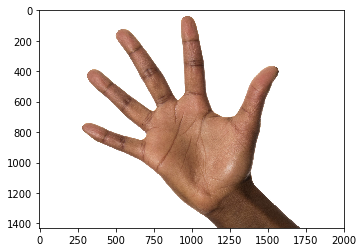

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/human-hand-back-pic.jpg')

# make copy of the image 
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

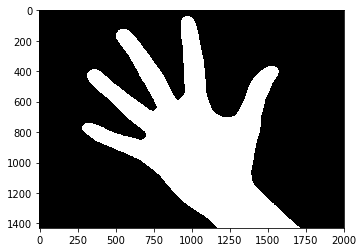

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a binary threshold image (THRESH_BINARY_INV get binary and turn white to black)
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')


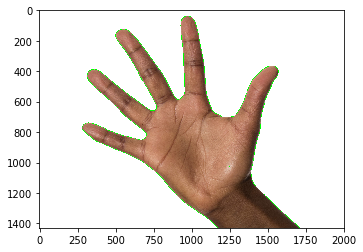

In [6]:
# Find contours from threshold image

retval, contours, hierarchy = cv2.findContours(binary, 
                                               cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
image_copy2 = np.copy(image_copy)
all_contours = cv2.drawContours(image=image_copy2, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2)

plt.imshow(all_contours)

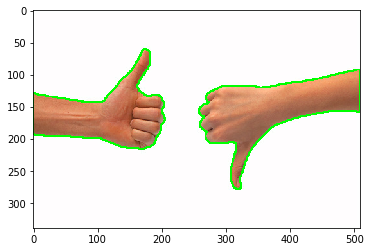

In [11]:
# 
# image = cv2.imread('images/human-hand-back-pic.jpg')
# 
# # make copy of the image 
# image_copy = np.copy(image)
# 
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Read in an image and convert to RGB
image = cv2.imread('images/thumbs-up-down.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image_copy)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.imshow(contour_image)


In [12]:
## Complete this function so that 
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour


def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """

    # Create an empty list to store the angles in
    
    angles = []
    for contour in contours:
        # Fit an ellipse to a contour and extract the angle from that ellipse
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values


angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))


Angles of each contour (in degrees): [61.28632736206055, 83.03323364257812]


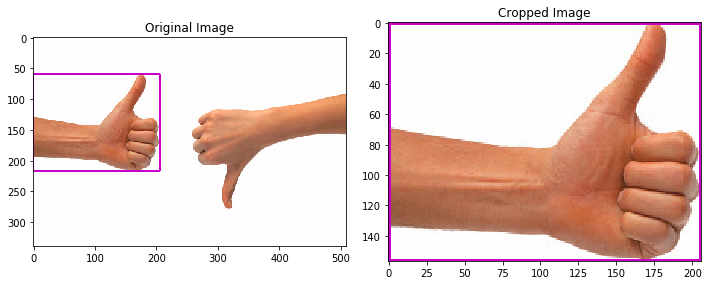

In [15]:
# Orientation values
# 
# These orientation values are in degrees measured from the x-axis. 
# A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!
# 
# So, the orientation angles that you calculated for each contour 
# should be able to tell us something about the general position of the hand. 
# The hand with it's thumb up, should have a higher (closer to 90 degrees) 
# orientation than the hand with it's thumb down.
# 
# Using this knowledge, your next task will be to focus only on the left hand. Keep scrolling!
## it returns a new, cropped version of the original image


def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param contours: the contour that will be used for cropping
    :return: the cropped image around the left hand
    """

    #Detect the bounding rectangle of the left hand contour
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    # Draw the bounding rectangle as a purple box
    box_image = cv2.rectangle(image, (x,y), (x+w,y+h), (200,0,200),2)
    # Crop using the dimensions of the bounding rectangle (x, y, w, h)
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y: y + h, x: x + w]
    return cropped_image


## Select the left hand contour from the list
selected_contour = contours[1]


# ---------------------------------------------------------- #
# If you've selected a contour

if selected_contour is not None:
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image_copy, selected_contour)

    # Display the cropped image side-by-side with the original
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    f.tight_layout()
    ax1.imshow(image_copy)
    ax1.set_title('Original Image')
    ax2.imshow(cropped_image)
    ax2.set_title('Cropped Image')